<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week5_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA dan Data Visualization Spotify 2023




## 1. Reproduksi Kode Asli

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load data
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Kolom dataset
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

## 2. Penjelasan Persamaan Matematika

### A. Statistik Dasar

1. **Mean (Rata-rata)**
   - Rumus: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$
   - Penjelasan: Menghitung nilai tengah dari seluruh data streams
   - Contoh: Jika ada 5 lagu dengan streams [100, 200, 300, 400, 500], maka mean = (100+200+300+400+500)/5 = 300

2. **Median**
   - Rumus: Nilai tengah dari data yang telah diurutkan
   - Penjelasan: Lebih robust terhadap outlier dibanding mean
   - Contoh: Untuk data [100, 200, 300, 400, 500], median = 300

3. **Standard Deviasi**
   - Rumus: $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}$
   - Penjelasan: Mengukur sebaran data dari mean
   - Contoh: Untuk data [100, 200, 300, 400, 500], σ ≈ 158.11

### B. Korelasi

1. **Pearson Correlation**
   - Rumus: $r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2}}$
   - Penjelasan: Mengukur hubungan linear antara dua variabel
   - Nilai berkisar dari -1 hingga 1
   - Contoh: Korelasi antara streams dan BPM

## 3. EDA dan Visualisasi Data

In [ ]:
# Preprocessing data
numeric_columns = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                  'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                  'in_deezer_charts', 'in_shazam_charts']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Analisis missing values
missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0])

Jumlah Missing Values per Kolom:
streams                 1
in_deezer_playlists    79
in_shazam_charts       57
key                    95
dtype: int64


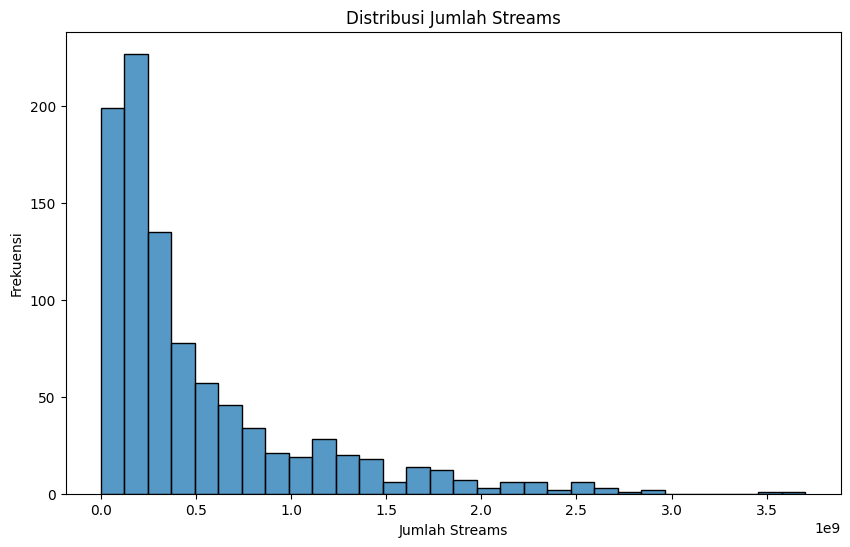

In [ ]:
# Visualisasi distribusi streams
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='streams', bins=30)
plt.title('Distribusi Jumlah Streams')
plt.xlabel('Jumlah Streams')
plt.ylabel('Frekuensi')
plt.show()

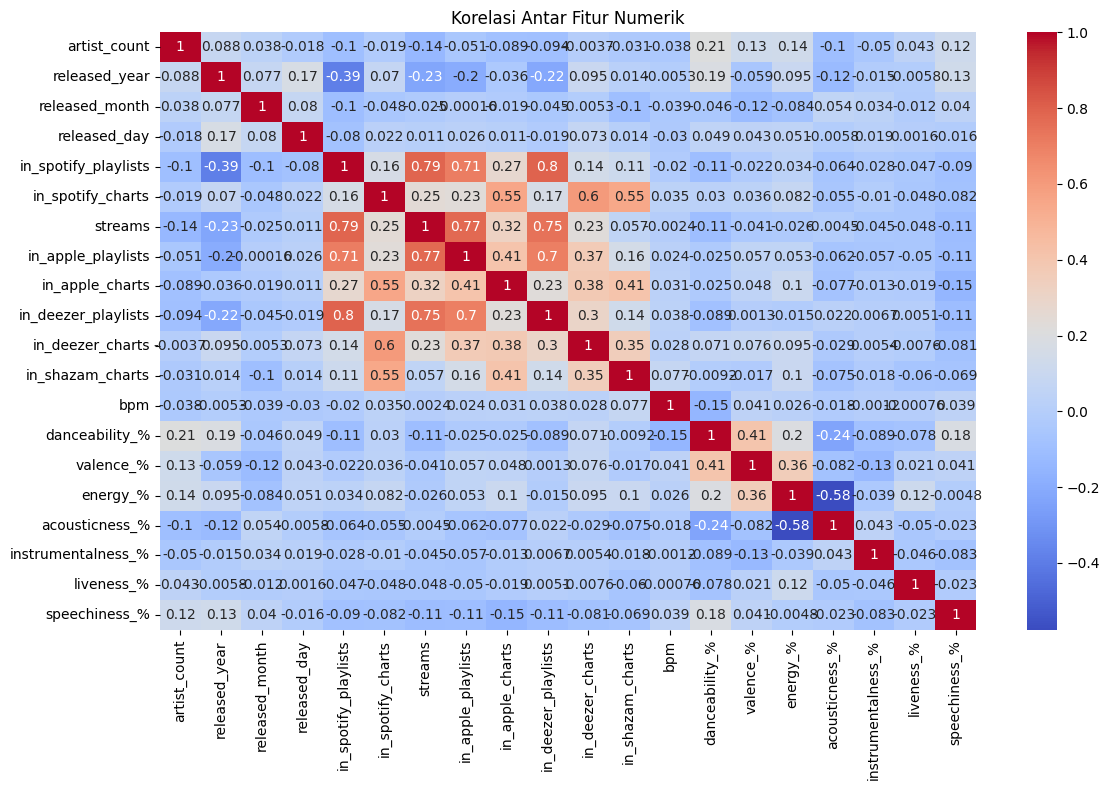

In [ ]:
# Analisis korelasi
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

Top 10 Lagu Terpopuler:
                                        track_name  \
55                                 Blinding Lights   
179                                   Shape of You   
86                               Someone You Loved   
620                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
725                                         Closer   
48                                         Starboy   

                   artist(s)_name       streams  
55                     The Weeknd  3.703895e+09  
179                    Ed Sheeran  3.562544e+09  
86                  Lewis Capaldi  2.887242e+09  
620                   Tones and I  2.864792e+09  
41          Post Malone, Swae Lee  2.808097e+09  
162           Drake, WizKid, Kyla  2.713922e+09  
84   Justin Bieber, The Kid Lar

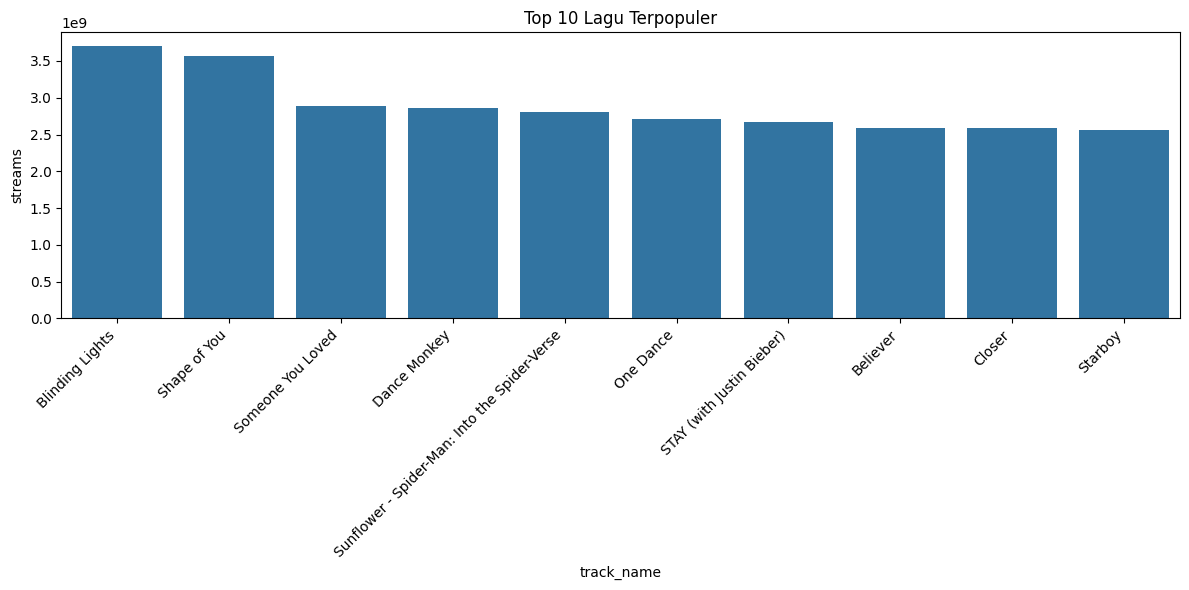

In [ ]:
# Analisis top songs
top_songs = df.nlargest(10, 'streams')

print("Top 10 Lagu Terpopuler:")
print(top_songs[['track_name', 'artist(s)_name', 'streams']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_songs, x='track_name', y='streams')
plt.title('Top 10 Lagu Terpopuler')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

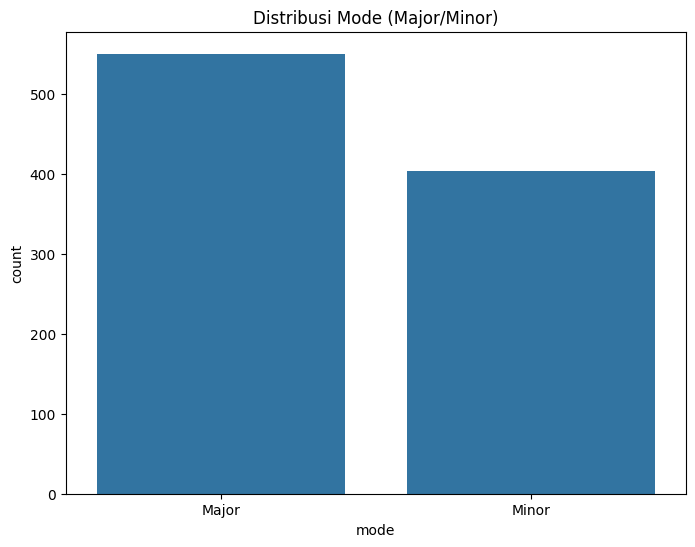

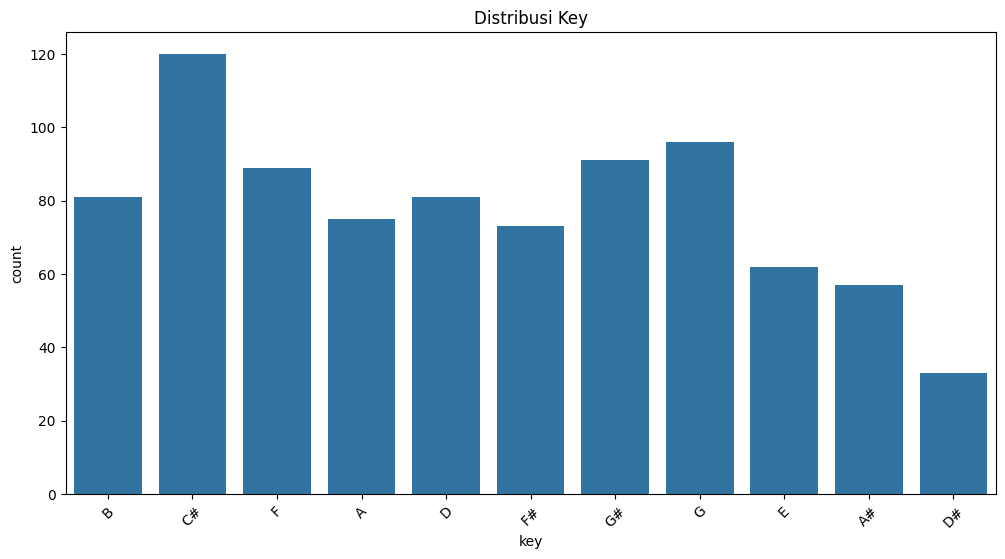

In [ ]:
# Analisis mode dan key
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mode')
plt.title('Distribusi Mode (Major/Minor)')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key')
plt.title('Distribusi Key')
plt.xticks(rotation=45)
plt.show()

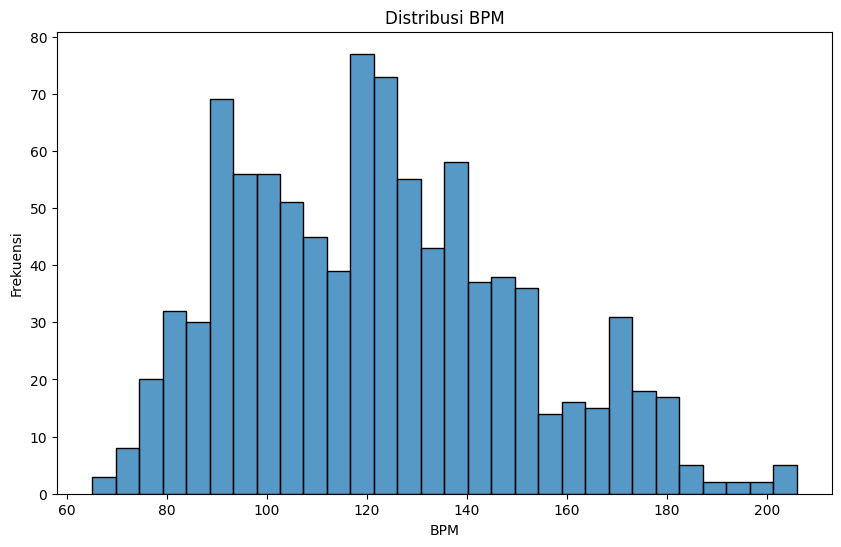

Statistik BPM untuk Top 10 Songs:
count     10.00000
mean     124.50000
std       36.84879
min       90.00000
25%       96.50000
50%      107.00000
75%      158.75000
max      186.00000
Name: bpm, dtype: float64


In [ ]:
# Analisis BPM
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bpm', bins=30)
plt.title('Distribusi BPM')
plt.xlabel('BPM')
plt.ylabel('Frekuensi')
plt.show()

print("Statistik BPM untuk Top 10 Songs:")
print(top_songs['bpm'].describe())